# Prediction of Placement Status

Name - Atharv Mahesh Musale

Intern ID -4024

1) Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

2) Load the data

In [2]:
train_data = pd.read_excel('01 Train Data.xlsx')
test_data = pd.read_excel('02 Test Data.xlsx')
train_data.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed


In [3]:
test_data.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,1,NaN,Hello ML and DL,2.293940e+09,NaN,Free Order,USD,0,...,Attending,"symbiosis institute of technology, pune",Whatsapp,NaN,Students,NaN,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,"mit academy of engineering ,alandi",Whatsapp,NaN,Students,NaN,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,1,NaN,Hello ML and DL,2.293941e+09,NaN,Free Order,USD,0,...,Attending,a. c. patil college of engineering,Whatsapp,NaN,Students,NaN,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,1,NaN,Hello ML and DL,2.293946e+09,NaN,Free Order,USD,0,...,Attending,wilson college,Others,NaN,Students,NaN,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,1,NaN,Hello ML and DL,2.293956e+09,NaN,Free Order,USD,0,...,Attending,"ld college of engineering, ahmedabad, gujarat",Whatsapp,NaN,Students,NaN,6.7,5,5,NaN


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      4894 non-null   object 
 5   Attendee #                                                       4490 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

In [5]:
relevant_columns = ['College Name', 'CGPA', 'Speaking Skills', 'ML Knowledge', 'Placement Status']
train_df = train_data[relevant_columns].copy()
train_df.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,6.7,2,5,Placed
1,AP SHAH INSTITUTE OF TECHNOLOGY,8.2,3,2,Not placed
2,Don Bosco College of Engineering Fatorda Goa,6.5,4,3,Not placed
3,Pillai College of Engineering New Panvel,8.7,2,5,Not placed
4,St Xavier's College,9.1,3,5,Placed


In [6]:
train_df['Placement Status'] = train_df['Placement Status'].apply(lambda x: 1 if x == 'Placed' else 0)

In [7]:
train_df = train_df.dropna()
train_df.head()

,College Name,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,6.7,2,5,1
1,AP SHAH INSTITUTE OF TECHNOLOGY,8.2,3,2,0
2,Don Bosco College of Engineering Fatorda Goa,6.5,4,3,0
3,Pillai College of Engineering New Panvel,8.7,2,5,0
4,St Xavier's College,9.1,3,5,1


3) Data Visualization

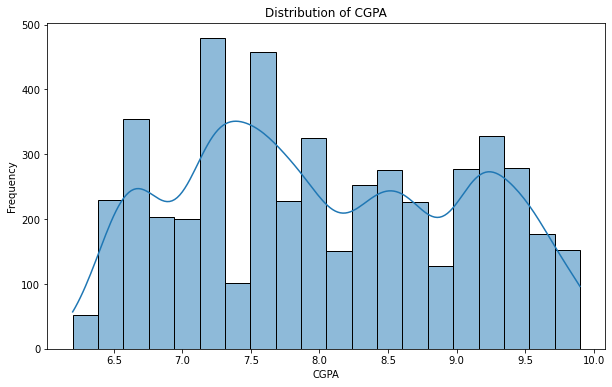

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['CGPA'], kde=True, bins=20)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

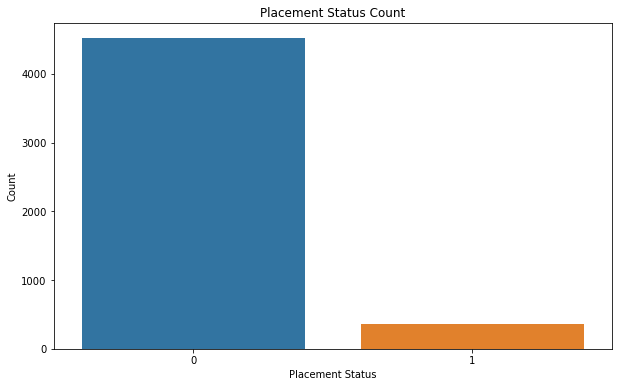

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Placement Status', data=train_df)
plt.title('Placement Status Count')
plt.xlabel('Placement Status')
plt.ylabel('Count')
plt.show()

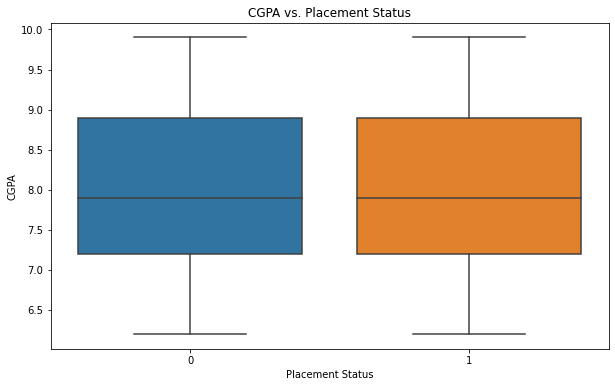

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement Status', y='CGPA', data=train_df)
plt.title('CGPA vs. Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show()

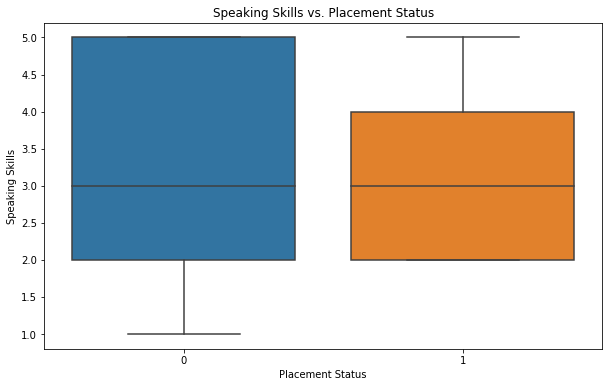

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement Status', y='Speaking Skills', data=train_df)
plt.title('Speaking Skills vs. Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Speaking Skills')
plt.show()

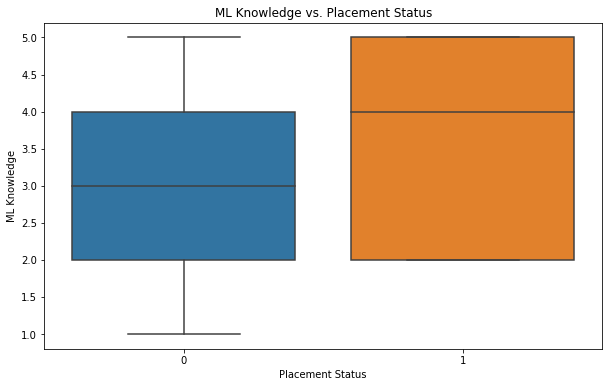

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Placement Status', y='ML Knowledge', data=train_df)
plt.title('ML Knowledge vs. Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('ML Knowledge')
plt.show()

4) Model Training

In [13]:
label_encoder = LabelEncoder()
train_df['College Name'] = label_encoder.fit_transform(train_df['College Name'])

In [14]:
X = train_df.drop('Placement Status', axis=1)
y = train_df['Placement Status']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train[['CGPA', 'Speaking Skills', 'ML Knowledge']] = scaler.fit_transform(X_train[['CGPA', 'Speaking Skills', 'ML Knowledge']])
X_val[['CGPA', 'Speaking Skills', 'ML Knowledge']] = scaler.transform(X_val[['CGPA', 'Speaking Skills', 'ML Knowledge']])

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

5) Model Evaluation

In [18]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Model accuracy: {accuracy}')
print("Classification Report: \n", classification_report(y_val, y_pred))

Model accuracy: 0.8872950819672131
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       894
           1       0.13      0.06      0.08        82

    accuracy                           0.89       976
   macro avg       0.52      0.51      0.51       976
weighted avg       0.85      0.89      0.87       976



6) Prediction of Test Data

In [19]:
test_df = test_data[['College Name', 'CGPA', 'Speaking Skills', 'ML Knowledge']].copy()

test_df['College Name'] = test_df['College Name'].fillna('Unknown')
test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']] = test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']].fillna(test_df.mean())

all_colleges = list(label_encoder.classes_) + ['Unknown']
label_encoder.classes_ = all_colleges
test_df['College Name'] = label_encoder.transform(test_df['College Name'])

test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']] = scaler.transform(test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']])

test_predictions = model.predict(test_df)

test_data['Placement Status Predicted'] = test_predictions


C:\Users\SIDHI\AppData\Local\Temp\ipykernel_8552\1066848199.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']] = test_df[['CGPA', 'Speaking Skills', 'ML Knowledge']].fillna(test_df.mean())


7) Save Predicted Data

In [20]:
test_data.to_excel('Predicted Data.xlsx', index=False)